Tenker å fjerne tagline, overview, keywords, imdb_id, poster_path, status, original_title.

alle som har en homepage er 1 og de som ikke har det er 0.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_ = pd.read_csv('data/train.csv')
test_ = pd.read_csv('data/test.csv')

train = train_.copy()
test = test_.copy()

test_id = test['id'].copy()

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

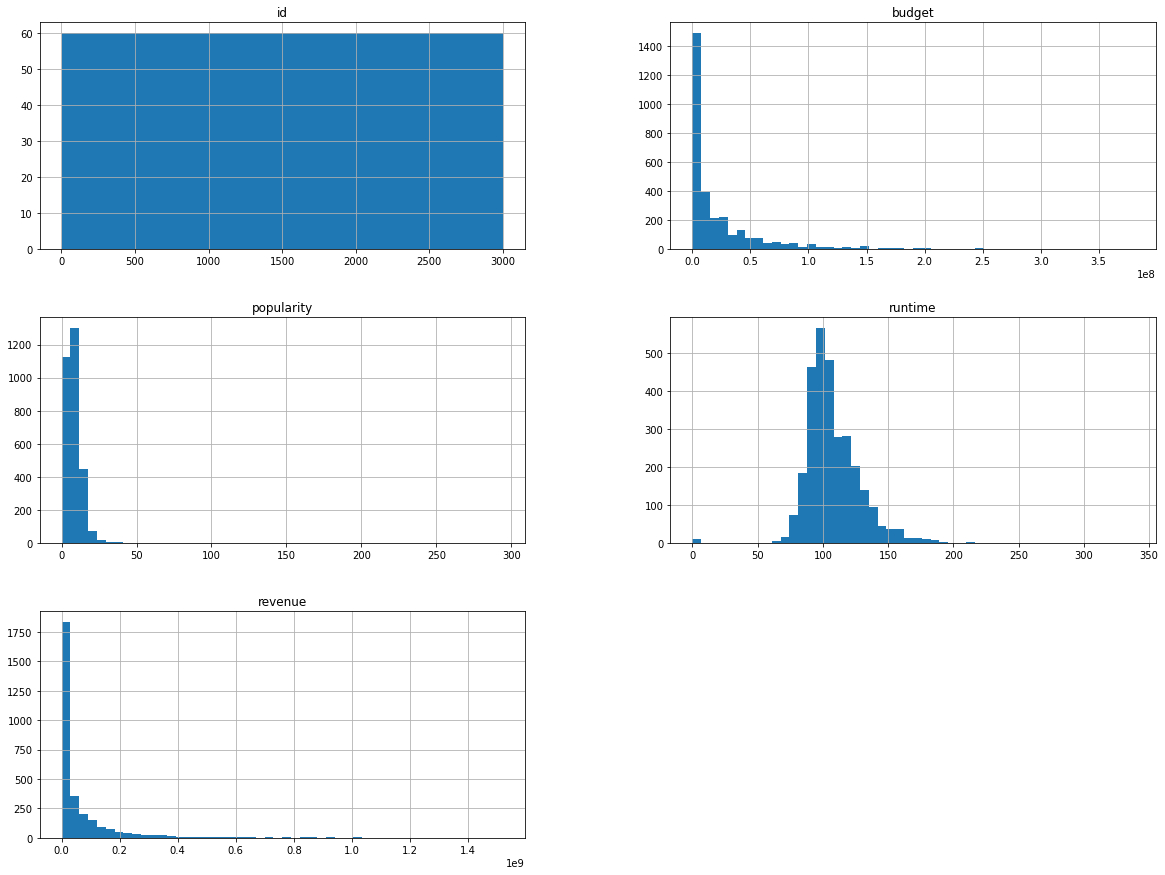

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

# fixing data set

Fixing the object "Collection", by changing it to wither has collection or not.

In [8]:
train["has_collection"] = train["belongs_to_collection"].apply(lambda x: 0 if x is np.nan else 1)
test["has_collection"] = test["belongs_to_collection"].apply(lambda x: 0 if x is np.nan else 1)
train["has_homepage"] = train["homepage"].apply(lambda x: 0 if x is np.nan else 1)
test["has_homepage"] = test["homepage"].apply(lambda x: 0 if x is np.nan else 1)

In [9]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue           1.000000
budget            0.752965
popularity        0.461460
has_collection    0.339425
has_homepage      0.263179
runtime           0.216380
id                0.000610
Name: revenue, dtype: float64

In [10]:
train_labels = train["revenue"].copy()
train_OL = train["original_language"].copy()
test_OL = test["original_language"].copy()
train = train.drop("revenue", axis=1)

df = pd.DataFrame(train)
df = df.select_dtypes(exclude=['object'])
train_num = df.drop('id', axis=1)


df_test = pd.DataFrame(test)
df_test = df_test.select_dtypes(exclude=['object'])
test_num = df_test.drop('id', axis=1)

In [11]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [12]:
imputer.fit(df)

SimpleImputer(strategy='median')

# transformatin pipeline

In [13]:
train_num_attribs = list(train_num)

In [14]:
train_num.head()

,budget,popularity,runtime,has_collection,has_homepage
0,14000000,6.575393,93.0,1,0
1,40000000,8.248895,113.0,1,0
2,3300000,64.299990,105.0,0,1
3,1200000,3.174936,122.0,0,1
4,0,1.148070,118.0,0,0


In [15]:
test_num.head()

,budget,popularity,runtime,has_collection,has_homepage
0,0,3.851534,90.0,1,1
1,88000,3.559789,65.0,0,0
2,0,8.085194,100.0,0,0
3,6800000,8.596012,130.0,0,1
4,2000000,3.217680,92.0,0,0


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [19]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
#cat_attribs = ["original_language"]
num_attribs = list(train_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        #("cat", OneHotEncoder(), cat_attribs),
    ])
train_num_tr = full_pipeline.fit_transform(train)
test_num_tr = full_pipeline.transform(test)

In [20]:
train_num_tr.shape

(3000, 5)

In [21]:
test_num_tr.shape

(4398, 5)

# Model

In [22]:
X = train_num_tr
y = train_labels
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [23]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [24]:
#from sklearn.linear_model import SGDClassifier
#SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
#SGD.fit(X, y)

In [25]:
#from sklearn.linear_model import LogisticRegression 
#log_reg = LogisticRegression(max_iter=500)
#log_reg.fit(X, y)

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=69)
forest_reg.fit(X, y)

RandomForestRegressor(random_state=69)

### Trying out voting classifier 
combining Random Forest, Logistic regression and SVC.

In [27]:
#from sklearn.ensemble import RandomForestClassifier 
#from sklearn.ensemble import VotingClassifier
#from sklearn.svm import SVC
#log_clf = LogisticRegression(max_iter=500)
#rnd_clf = RandomForestClassifier()
#svm_clf = SVC()
#voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
#voting_clf.fit(X, y)

#### compairing mean squared error

In [28]:
#log_reg_predictions = log_reg.predict(X)
#log_reg_mse = mean_squared_error(y, log_reg_predictions)
#log_reg_rmse = np.sqrt(log_reg_mse)
#log_reg_rmse

In [29]:
from sklearn.metrics import mean_squared_error
knn_predictions = neigh.predict(X)
knn_mse = mean_squared_error(y, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

74074383.45091152

In [30]:
lin_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81999965.60046963

In [31]:
#SGD_predictions = SGD.predict(X)
#SGD_mse = mean_squared_error(y, SGD_predictions)
#SGD_rmse = np.sqrt(SGD_mse)
#SGD_rmse

In [32]:
forest_reg_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

30051901.8157818

In [33]:
#voting_clf_prediction = voting_clf.predict(X)
#voting_mse = mean_squared_error(y, voting_clf_prediction)
#voting_rmse = np.sqrt(voting_mse)
#voting_rmse

# Evaluation
evaluetes the two best models.

In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [35]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [71561979.08019209 72062201.52962787 93161543.70462212 72448716.46909532
 81943036.8096005  91254737.97276576 67891500.01884755 84455307.84198055
 82702285.43093666 74245595.50283453]
Mean: 79172690.43605031
Standard deviation: 8336294.8748999555


In [36]:
lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [82970073.66402932 84733013.90347676 91219944.6440065  81583655.25578707
 74815996.9912583  95307571.03017126 67960649.94601153 79829519.4758499
 85169238.66242926 79397348.01919232]
Mean: 82298701.15922122
Standard deviation: 7348690.079864983


# Fine tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=5),
    }

forest_reg = RandomForestRegressor(random_state=69)

rnd_search = RandomizedSearchCV(
                forest_reg, 
                param_distributions=param_distribs,
                n_iter=10, 
                cv=5, 
                scoring='neg_mean_squared_error', 
                random_state=69
            )

rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c689ca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c689310>},
                   random_state=69, scoring='neg_mean_squared_error')

In [38]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

78637511.32098074 {'max_features': 3, 'n_estimators': 108}
78274350.58955795 {'max_features': 3, 'n_estimators': 184}
78972349.46583794 {'max_features': 1, 'n_estimators': 50}
81264021.69607036 {'max_features': 3, 'n_estimators': 10}
79831990.3637095 {'max_features': 1, 'n_estimators': 39}
78690682.23514383 {'max_features': 1, 'n_estimators': 89}
78479638.70416541 {'max_features': 1, 'n_estimators': 166}
78885465.55525045 {'max_features': 3, 'n_estimators': 76}
84956293.41437615 {'max_features': 2, 'n_estimators': 4}
78468898.82305524 {'max_features': 1, 'n_estimators': 168}


In [39]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.5340187 , 0.27099757, 0.12061787, 0.05401796, 0.0203479 ])

In [40]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.5340187000028649, 'budget'),
 (0.2709975740794743, 'popularity'),
 (0.12061786747560511, 'runtime'),
 (0.054017959528962566, 'has_collection'),
 (0.02034789891309309, 'has_homepage')]

In [41]:
rnd_search.best_params_

{'max_features': 3, 'n_estimators': 184}

# Final model

In [42]:
final_model = rnd_search.best_estimator_
final_predictions_S =  final_model.predict(test_num_tr)

In [43]:
len(final_predictions_S)

4398

In [44]:
submission = pd.DataFrame({
    'id': test_id,
    'revenue': final_predictions_S
})

In [45]:
submission.head()

,id,revenue
0,3001,1.428002e+07
1,3002,2.872754e+06
2,3003,6.698273e+06
3,3004,3.600331e+07
4,3005,6.999814e+06


In [46]:
submission.to_csv('submission.csv', index=False)

On our first submission, we tried out alot of models. We tried out KNN, stochastic gradient decent, logastic regression, linear regression, random forest regressor. We tried to just remove all objects to only have floats left. We found out that budget was a really good attribute and used that primarily. With only the float coloubs left, random forest regressor was the best model. On this submission we got 2.66307.

On our second submission, we added has_collection and has_homepage, in addition to a randomstate to the random forest regressor. We got 2.63794